In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('df_banco.csv')
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


A primera vista el set de datos parece en orden, sin embargo uno de los aspectos que mas llama la atencion estan en la columna (days_employed) los cuales cuenta con datos negativos, mas adelante revisaremos mas a fondo el tema

In [3]:
# Analizar los datos, si hay vacios, nulos o duplicados
print(f"Total datos duplicados: {df.duplicated().sum()}")
print(f"Total datos nulos: {df.isnull().sum()}")

Total datos duplicados: 54
Total datos nulos: children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


#### Supuesto: Hay una relacion entre los valores nulos y el nivel educativo de las personas ya que a bajo nivel educativo habra mas informalidad, por ende los ingresos serian menores (total_income o days_employed)

Como se observa el set de datos contiene un total de 54 duplicados, y contiene 2174 datos nulos en dos columnas (days_employed & total_income),al compartir la misma cantidad de datos nulos podriamos decir que estas columnas podrian estar relacionadas, lo cual puede sugerir que las personas que no cuentan con dias de empleo no cuentan con un ingreso mensual.

#### Analisis de Educacion

In [5]:
df['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

Podemos observar que los datos estan codificados con un conjunto de mayusculas y minusculas, antes de continuar con el analisis ajustaremos correctamente los datos.

In [6]:
df['education']= df['education'].str.lower()
df['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

Ahora podemos vislumbrar mejorar el nivel educativo con el que cuentan las personas, estas van desde la primaria hasta un nivel de educacion superior.

Revisemos los datos aplicando un filtro para conocer los valores ausentes segun el nivel de educacion:

In [7]:
nivel_educativo = df['education'].unique()
nivel_educativo

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

In [8]:
conteo_nulos = {}

for nivel in nivel_educativo:
    # Filtramos el data set por nivel educativo
    subset = df[df['education'] == nivel]

    # Contamos los valores nulos en las columnas total_income
    nulos_total_income = subset['total_income'].isnull().sum()

    # almacenamos el conteo en el diccionario
    conteo_nulos[nivel] = nulos_total_income

# Mostrar los resultados
for edu_level, count in conteo_nulos.items():
    print(f"Nivel educativo: {edu_level} - Valores nulos en total_income: {count}")


Nivel educativo: bachelor's degree - Valores nulos en total_income: 544
Nivel educativo: secondary education - Valores nulos en total_income: 1540
Nivel educativo: some college - Valores nulos en total_income: 69
Nivel educativo: primary education - Valores nulos en total_income: 21
Nivel educativo: graduate degree - Valores nulos en total_income: 0


In [9]:
total_por_educacion = {}

for nivel in nivel_educativo:
    # Filtramos el data set por nivel educativo
    subset = df[df['education']== nivel]

    # Contamos el total de datos por nivel educativo
    education_level_total = len(subset['education'])

    total_por_educacion[nivel]= education_level_total

# Mostrar los resultados
for edu_level, count in total_por_educacion.items():
    print(f"Nivel educativo: {edu_level} - Valores nulos en total_income: {count}")

Nivel educativo: bachelor's degree - Valores nulos en total_income: 5260
Nivel educativo: secondary education - Valores nulos en total_income: 15233
Nivel educativo: some college - Valores nulos en total_income: 744
Nivel educativo: primary education - Valores nulos en total_income: 282
Nivel educativo: graduate degree - Valores nulos en total_income: 6


In [10]:
education_level = pd.DataFrame(list(total_por_educacion.items()), columns=['education_level', 'count'])
nulos_education = pd.DataFrame(list(conteo_nulos.items()), columns=['education_level', 'count_null'])
new_table= education_level.merge(nulos_education,on='education_level')

# calcular el porcentaje de nulos por nivel educativo
new_table['null_percentage']= new_table['count_null']/new_table['count'] *100
new_table['null_percentage_of_total']= new_table['count_null']/ new_table['count_null'].sum()* 100
new_table

,education_level,count,count_null,null_percentage,null_percentage_of_total
0,bachelor's degree,5260,544,10.342205,25.022999
1,secondary education,15233,1540,10.109630,70.837167
2,some college,744,69,9.274194,3.173873
3,primary education,282,21,7.446809,0.965961
4,graduate degree,6,0,0.000000,0.000000


In [11]:
# Comprobar la distribucion en el conjunto de datos
total_data= len(df)
data_null= 2174

distribution = data_null/ total_data *100
print(f"Distribucion de datos nulos en total_income: {distribution:.2f}%")

Distribucion de datos nulos en total_income: 10.10%


Hasta ahora podemos ver que el el total de datos nulos de nuestro data set representa el 10% del total de nuestros datos, sin embargo al entrar mas en detallesobservamos que solo el 71% de los datos nulos totales pertenecen a las personas con un nivel educativo bajo, si bien hay una gran mayoria esto igual no cubre el total de datos nulos por lo que podemos asumir que no existe una relacion entre valores ausentes y nivel educativo. 

#### Supuesto 2 

Tomaremos la columna de (income_type) para verificarsi hay relacion o descartarla, esto ya que se piensa que el tipo de empleo puede ser otro factor por el cual un cliente no tendria experiencia laboral y tampoco reciba ingresos (pueden estar retirados o desempleados)

In [12]:
df['income_type'].value_counts(dropna=False)

income_type
employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: count, dtype: int64

In [13]:
# Analizaremos valores ausentes en las columnas days_employed y total_income
# Realizaremos un filtro entre los dias laborados y las personas que se encuentran retiradas

df[(df['days_employed'].isnull()) & (df['income_type']=='retiree')]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
67,0,NaN,52,bachelor's degree,0,married,0,F,retiree,0,NaN,purchase of the house for my family
145,0,NaN,62,secondary education,1,married,0,M,retiree,0,NaN,building a property
...,...,...,...,...,...,...,...,...,...,...,...,...
21311,0,NaN,49,secondary education,1,married,0,F,retiree,0,NaN,buying property for renting out
21321,0,NaN,56,secondary education,1,married,0,F,retiree,0,NaN,real estate transactions
21414,0,NaN,65,secondary education,1,married,0,F,retiree,0,NaN,purchase of my own house
21415,0,NaN,54,secondary education,1,married,0,F,retiree,0,NaN,housing transactions


Podemos verificar que solo hay 413 entradas nulas para el total de personas con estatus de retirado lo cual podria justificar la falta de dias de experiencia, sin embargo la mayoria cuentan con dias de empleo actualmente por lo que finalmente podemos decir que no el estar retirado no justifica la falta de estos valores. 

In [14]:
# Revisar si hay relacion entre las personas con estatus de employee y los valores nulos en days_employed

df[(df['days_employed'].isnull()) & (df['income_type']=='employee')]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
82,2,NaN,50,bachelor's degree,0,married,0,F,employee,0,NaN,housing
83,0,NaN,52,secondary education,1,married,0,M,employee,0,NaN,housing
90,2,NaN,35,bachelor's degree,0,married,0,F,employee,0,NaN,housing transactions
96,0,NaN,44,secondary education,1,married,0,F,employee,0,NaN,buy residential real estate
97,0,NaN,47,bachelor's degree,0,married,0,F,employee,0,NaN,profile education
...,...,...,...,...,...,...,...,...,...,...,...,...
21432,1,NaN,38,some college,2,unmarried,4,F,employee,0,NaN,housing transactions
21463,1,NaN,35,bachelor's degree,0,civil partnership,1,M,employee,0,NaN,having a wedding
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


En total hay 2174 valores nulos de los cuales 1105 pertencen a personas con un estatus de empleado siendo casi un 50% de los datos faltantes, por lo tanto podemos concluir que o bien hubo un error al moemnto de digitalizar los datos o bien los clientes no llenaron este campo por diferentes razones.
Finalizando segun el estudio de los datos no hay una un patron especificio para la explicacion de los datos nulos.

In [15]:
# dataframe con valores ausentes
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


In [16]:
# dataframe sin valores ausentes
df.dropna().describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,19351.000000,19351.000000,19351.000000,19351.000000,19351.000000,19351.000000,19351.000000
mean,0.537388,63046.497661,43.255336,0.819079,0.972249,0.081184,26787.568355
std,1.371408,140827.311974,12.579170,0.550104,1.420596,0.273125,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


Podemos observar que con o sin valores ausentes los dos sets de datos son muy similiares en cuanto a su distribucion, por lo que podemos decir que los datos nulos fueron generados al azar. 

### 2. Transformacion de datos

Columna Educacion

In [17]:
df['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

Previamente se habia ajustado los valores, por lo que no es necesario tratar esta columna.

Columna Children

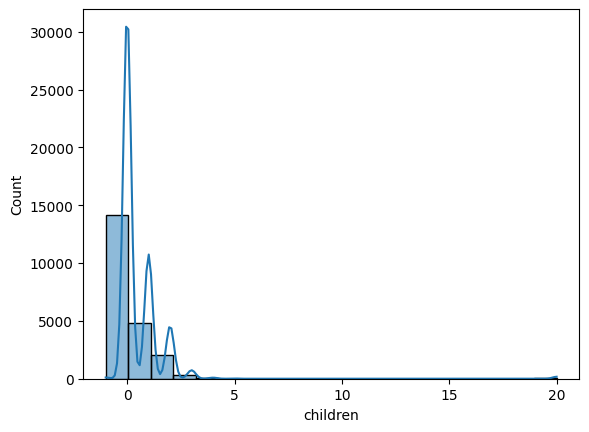

In [18]:
sns.histplot(data=df, x= 'children', multiple='dodge', kde=True, bins=20)
plt.show()

In [19]:
df['children'].value_counts(dropna=False)


children
 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: count, dtype: int64

Podemos observar que hay varios errores, entre ellos se observa que hay un numero negativo lo cual no puede existir un valor negativo, al igual que hay personas con un total de 20 hijos lo cual es muy poco probable, puede que hayan sido errores de typo, lo cuales entraremos a ajustar.

In [20]:
negative_children = 47
negative_children_percent=  negative_children/total_data

f'El porcentaje de valores negativos en la columna children es: {(negative_children_percent):.2%}'

'El porcentaje de valores negativos en la columna children es: 0.22%'

Se realizo la prueba para estmar el porcentaje de valores negativos sobre el totoal de los datos, estos son muy cercanos a 0 por lo cual no serian relevantes para nuestro analais, sin embargo como se considera que estos datos no son correctos  se cambiaran a positivos

In [21]:
df['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [22]:
# primero ajustaremos a valores positivos
df['children']= df['children'].abs()

# Luego reemplazaremos los valores de 20 a 2 
df['children']= df['children'].replace(20,2)
df['children'].unique()

array([1, 0, 3, 2, 4, 5])

Columna Days Employeed

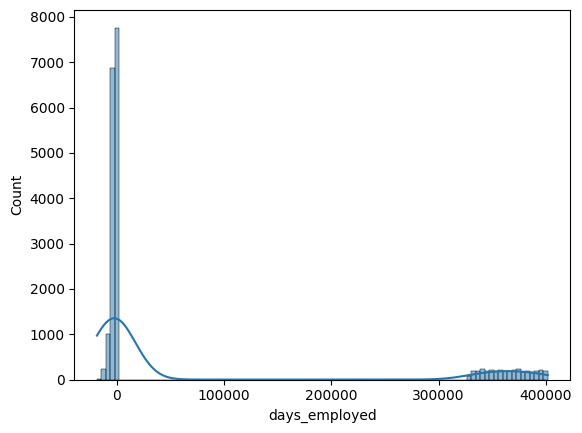

In [23]:
# revisando distribucion de valores

sns.histplot(data=df, x= 'days_employed', multiple='dodge', kde=True, bins=100)
plt.show()

In [24]:
df['days_employed'].value_counts()

days_employed
-1984.507589    1
-8437.673028    1
-4024.803754    1
-5623.422610    1
-4124.747207    1
               ..
-792.701887     1
-4171.483647    1
-2188.756445    1
-6929.865299    1
-152.779569     1
Name: count, Length: 19351, dtype: int64

Podemos notar dos cosas importantes con esta columna, la primera es que tenemos datos en negativo lo cual no tiene mucho sentido segun el contexto en el que nos encontramos, dos valores de tipo flotante adicional a esto lo que previamente hemos revisado de los datos nulos, se realizara:

ajuste de valores negativos, ajuste del tipo de datos a enteros y se ajustaran los valores faltantes como 0

In [25]:
df['days_employed']= df['days_employed'].fillna(0)
df['days_employed']= df['days_employed'].abs()
df['days_employed']= df['days_employed'].astype(int)
df['days_employed']

0          8437
1          4024
2          5623
3          4124
4        340266
          ...  
21520      4529
21521    343937
21522      2113
21523      3112
21524      1984
Name: days_employed, Length: 21525, dtype: int64

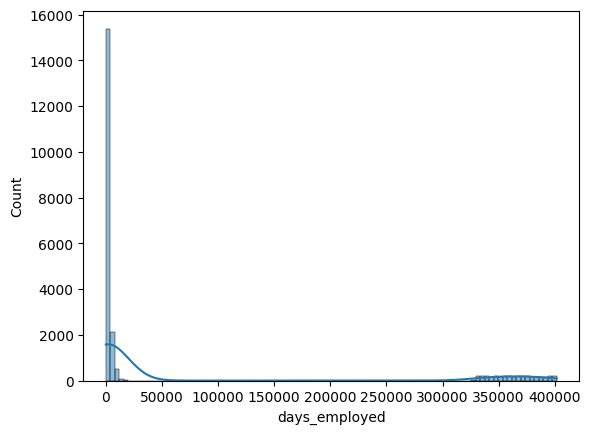

days_employed
0         2174
327         16
133         16
438         15
223         14
          ... 
389656       1
365328       1
389336       1
6929         1
340266       1
Name: count, Length: 9087, dtype: int64

In [26]:
# revisando distribucion de valores

sns.histplot(data=df, x= 'days_employed', multiple='dodge', kde=True, bins=100)
plt.show()

df['days_employed'].value_counts()


Ahora los datos estan mucho mejor, sin embargo se puede notar que hay datos muy grandes, verificaremos si estan en otras unidades.

In [27]:
df['days_employed'].max()

np.int64(401755)

In [28]:
df['days_employed']= round(df['days_employed'] /24 )
df['days_employed']= df['days_employed'].astype(int)
df['days_employed'].max()

np.int64(16740)

el valor maximo es de 16740 que equivalen a 45 años, lo cual es mas aterrizado a la realidad.

Columna dob_years

In [29]:
df['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75])

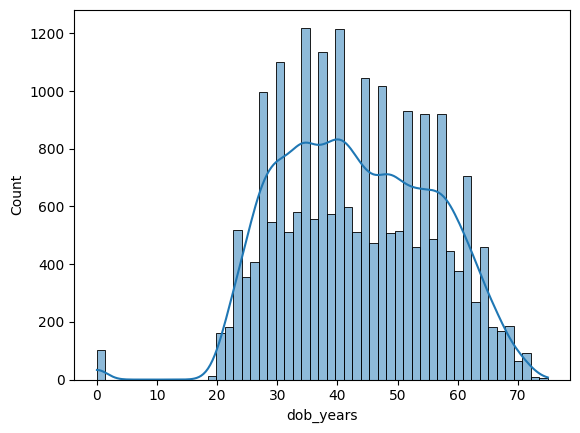

In [30]:
sns.histplot(data=df, x= 'dob_years', kde=True)
plt.show()

In [31]:
df['dob_years'][df['dob_years']==0].value_counts()

dob_years
0    101
Name: count, dtype: int64

Como podemos ver hay un valor que no ajusta bien a los datos que tenemos, no es posible que hayan personas con 0 años, en total son 101 datos lo cual corresponde al 0,4% del total de los datos, revisaremos media y mediana para ver por cual podemos reemplazar los datos en 0. 

In [32]:
print(df['dob_years'].mean())
print(df['dob_years'].median())

43.29337979094077
42.0


No hay mucha diferencia en cuanto a la media o la mediana por lo que procederemos a reemplazarlos con la media.

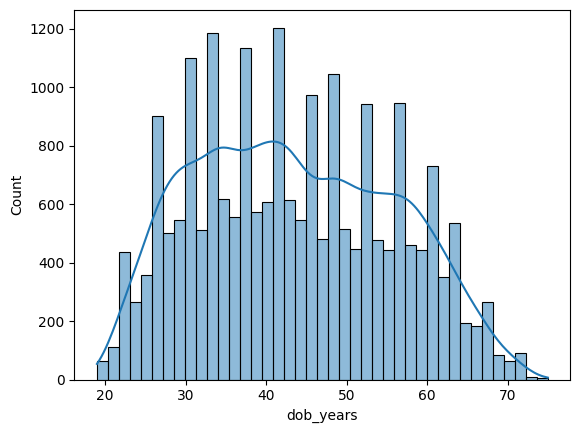

In [33]:
df['dob_years']= df['dob_years'].replace(0, 43)
sns.histplot(data=df, x= 'dob_years', kde=True)
plt.show()

In [34]:
df['dob_years'].value_counts()

dob_years
35    617
43    614
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
22    183
66    183
67    167
21    111
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: count, dtype: int64

Columna Family_status

In [35]:
print(df['family_status'].unique())
df['family_status'].value_counts()

['married' 'civil partnership' 'widow / widower' 'divorced' 'unmarried']


family_status
married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: count, dtype: int64

Aparentemente no hay datos por corregir.

Columna Gender

In [36]:
df['gender'].value_counts()

gender
F      14236
M       7288
XNA        1
Name: count, dtype: int64

Observamos que hay mas mujeres que hombres en cuanto a la distribucion por genero pero hay un valor ajeno al genero (XNA) por lo que para evitar cualquier inconveniente cambiaremos el dato a Femenino debido a que es mayoria de los datos y al ser solo uno no es altamanete representativo. 

In [37]:
df['gender']= df['gender'].replace('XNA','F')
df['gender'].value_counts()

gender
F    14237
M     7288
Name: count, dtype: int64

Columna Income Type

In [38]:
df['income_type'].value_counts()

income_type
employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: count, dtype: int64

No se apreicia valores fuera de lo comun. 

Valores Duplicados

In [39]:
print(f"Total datos duplicados: {df.duplicated().sum()}")


Total datos duplicados: 71


In [40]:
# Ahora podemos vislumbrar un total de 71 casos duplicados, procederemos a limpiarlos

df= df.drop_duplicates().reset_index(drop=True)
print(f"Total datos duplicados: {df.duplicated().sum()}")


Total datos duplicados: 0


In [41]:
df.shape

(21454, 12)

Hasta ahora realizamos la limpieza y el ajuste de los datos, sin embargo aun nos falta ajustar los valores ausentes de la columna 'total_income'.

In [42]:
# Para restaurar los valores ausentes en la columna total_income vamos a crear una nueva columna para agrupar por categorias

def age_range(row):
    if row['dob_years'] < 20:
        return '10-20'
    elif row['dob_years'] < 30:
        return '20-30'
    elif row['dob_years'] < 40:
        return '30-40'
    elif row ['dob_years'] < 50:
        return '40-50'
    elif row['dob_years'] < 60:
        return '50-60'
    else:
        return '60+'

In [43]:
# Usamos la funcion para agregar el rango de edades.
df['age_range']= df.apply(age_range, axis=1)
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_range
0,1,352,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-50
1,1,168,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,30-40
2,0,234,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,30-40
3,3,172,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,30-40
4,0,14178,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,50-60


Ahora que tenemos el rango de edades podemos ajustar los valores ausentes, filtraremos nuevamente la tabla sin valores ausentes verificaremos estadiscas que nos permitan ver el comportamiento y con ello podemos usar la media o la mediana que nos permita ajustar estos valores.

In [44]:
df_filt = df.dropna()
df_filt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19351 entries, 0 to 21453
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          19351 non-null  int64  
 1   days_employed     19351 non-null  int64  
 2   dob_years         19351 non-null  int64  
 3   education         19351 non-null  object 
 4   education_id      19351 non-null  int64  
 5   family_status     19351 non-null  object 
 6   family_status_id  19351 non-null  int64  
 7   gender            19351 non-null  object 
 8   income_type       19351 non-null  object 
 9   debt              19351 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           19351 non-null  object 
 12  age_range         19351 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 2.1+ MB


In [45]:
mean= df_filt.groupby('age_range')['total_income'].mean()
mean

age_range
10-20    16993.942462
20-30    25572.630177
30-40    28312.479963
40-50    28491.929026
50-60    25811.700327
60+      23021.639994
Name: total_income, dtype: float64

In [46]:
median= df_filt.groupby('age_range')['total_income'].median()
median

age_range
10-20    14934.9010
20-30    22799.2580
30-40    24667.5280
40-50    24755.6960
50-60    22203.0745
60+      19761.4250
Name: total_income, dtype: float64

Con esto podemos ver que no hay mucha diferencia en cuanto a los datos medios del ingreso de los clientes, no hay diferencias muy marcadas lo que nos dice tambien que los datos no muestran valores atipicos demasiado grandes, por lo que podemos proceder con el uso de la media (mean)

In [47]:
# Vamos a crear una funcion que nos ayude a rellenar los valores vacios de total_income

def replace(df):
    mean = df_filt.groupby('age_range')['total_income'].mean()

# Se crea un indice con las edades
# Luego se usa el loc para especificar la columna con las condiciones del filtrado booleano
    for age_group in mean.index:
        df.loc[(df['age_range'] == age_group) & (df['total_income'].isnull()),'total_income']= mean[age_group]
    return df

In [48]:
replace(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21454 non-null  int64  
 1   days_employed     21454 non-null  int64  
 2   dob_years         21454 non-null  int64  
 3   education         21454 non-null  object 
 4   education_id      21454 non-null  int64  
 5   family_status     21454 non-null  object 
 6   family_status_id  21454 non-null  int64  
 7   gender            21454 non-null  object 
 8   income_type       21454 non-null  object 
 9   debt              21454 non-null  int64  
 10  total_income      21454 non-null  float64
 11  purpose           21454 non-null  object 
 12  age_range         21454 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 2.1+ MB


Days_employed, recordemos que anteriormente la columna de days employeed tenia valores nulos los cuales se reemplazaron por "0", ahora podemos usar el mismo enfoque que usamos para total_income, se puede usar la columna de income_type ya que se puede suponer que esta esta en funcion de la experiencia, al igua que si tuvieramos tantos datos faltantes ahi el total de in_come tambien deberia ser un valor cercano, entonces tiene sentido buscar ajustar los valores 0 de la columna. 

In [49]:
df['days_employed'].value_counts()

days_employed
0        2103
8         201
9         185
10        169
14        161
         ... 
13994       1
15383       1
16228       1
15269       1
16125       1
Name: count, Length: 2616, dtype: int64

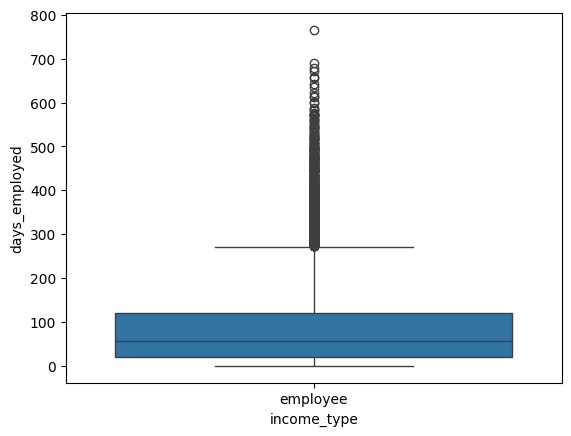

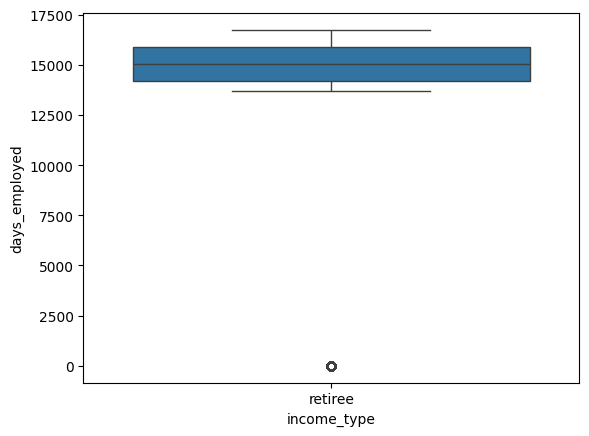

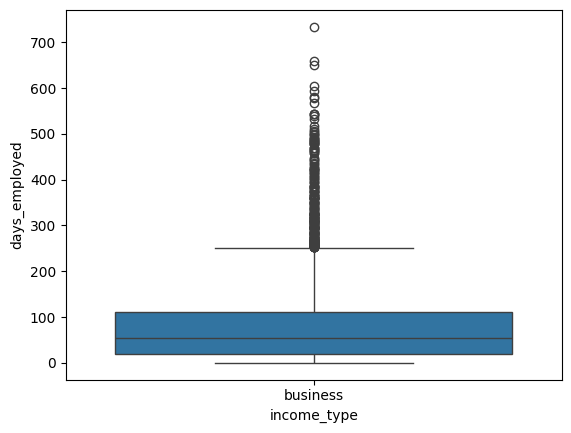

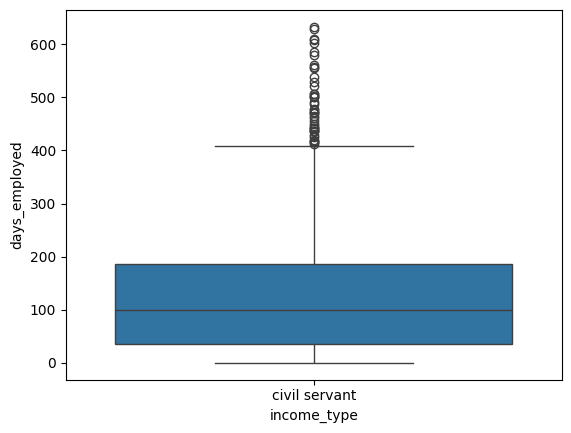

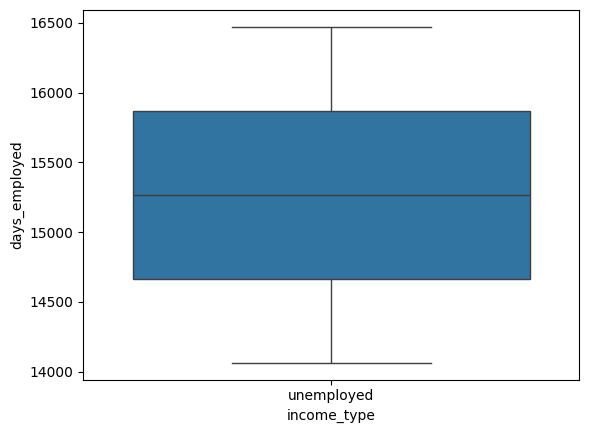

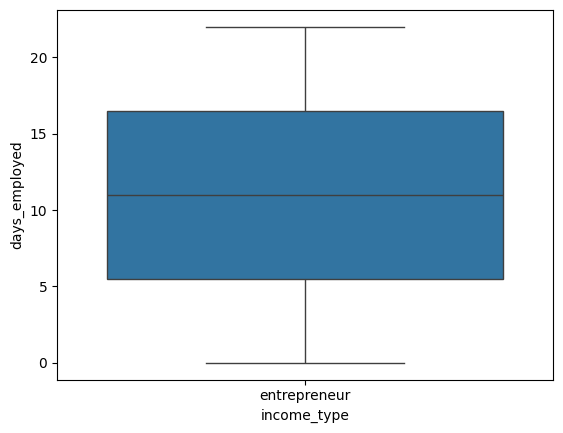

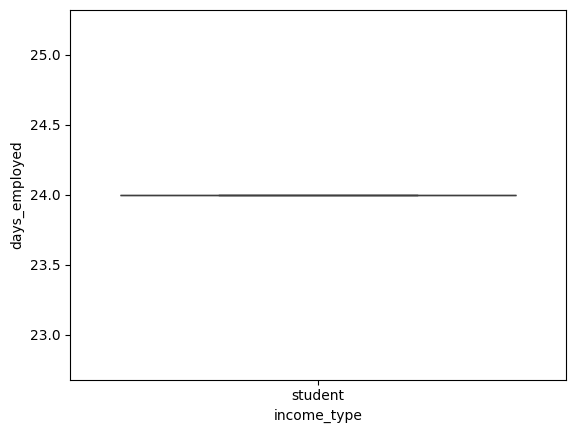

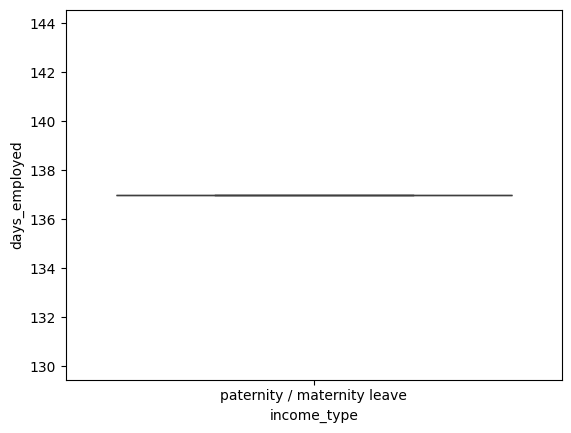

In [50]:
# Buscaremos la media de days_employed en funcion del tipo de ingreso
for employ in df['income_type'].unique():
    subset = df[df['income_type']== employ]
    sns.boxplot(data=subset, x='income_type', y='days_employed')
    plt.show()

In [51]:
# Buscaremos la mediana de days_employed en funcion del tipo de ingreso
job_meadian =df.groupby('income_type')['days_employed'].median().astype(int)
job_meadian

income_type
business                          55
civil servant                    100
employee                          57
entrepreneur                      11
paternity / maternity leave      137
retiree                        15032
student                           24
unemployed                     15267
Name: days_employed, dtype: int64

In [52]:
# Buscaremos la media de days_employed en funcion del tipo de ingreso
job_mean =df.groupby('income_type')['days_employed'].mean()
job_mean

income_type
business                          79.283773
civil servant                    127.545642
employee                          87.557741
entrepreneur                      11.000000
paternity / maternity leave      137.000000
retiree                        13675.299817
student                           24.000000
unemployed                     15267.500000
Name: days_employed, dtype: float64

lo que se realizo fue buscar tanto los valores de la media y mediana para los dias de experiencia en los diferentes sectores o tipos de empleo, ahora cual podemos usar, para este caso se elejira la mediana, ya que en algunos casos los datos atipicos altos pueden generar ruido estadistico.

In [53]:
# Vamos a crear una funcion que nos ayude a rellenar los valores vacios de total_income

def replace_0(df):
    job_meadian

    # Se crea un indice con las edades
    # Luego se usa el loc para especificar la columna con las condiciones del filtrado booleano
    for employ in job_meadian.index:
        df.loc[(df['income_type'] == employ) & (df['days_employed']== 0),'days_employed']= job_meadian[employ]
    return df

In [54]:
replace_0(df)
df.sample(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_range
15484,1,118,54,secondary education,1,civil partnership,1,F,employee,0,18721.384,building a real estate,50-60
14222,0,239,36,secondary education,1,married,0,F,employee,0,26431.430,buy residential real estate,30-40
18843,0,85,22,secondary education,1,unmarried,4,M,employee,0,8821.593,housing renovation,20-30
4488,0,46,50,primary education,3,divorced,3,F,employee,0,14218.547,building a real estate,50-60
19757,0,32,40,bachelor's degree,0,married,0,F,employee,0,25319.217,transactions with commercial real estate,40-50
11051,0,10,43,some college,2,unmarried,4,F,business,0,45592.524,buying my own car,40-50
7524,2,143,49,bachelor's degree,0,married,0,M,business,0,23546.495,real estate transactions,40-50
13197,0,28,45,bachelor's degree,0,married,0,F,employee,0,17158.079,buying property for renting out,40-50
10859,1,16018,53,secondary education,1,married,0,F,retiree,0,17388.279,housing renovation,50-60
9266,0,116,48,secondary education,1,married,0,F,employee,0,16700.761,buy commercial real estate,40-50


In [55]:
df['days_employed'].value_counts()

days_employed
57       1156
55        614
15032     388
100       220
8         201
         ... 
15442       1
15492       1
14690       1
14993       1
16653       1
Name: count, Length: 2615, dtype: int64

In [56]:
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
age_range           0
dtype: int64

#### Clasificacion de Datos

Para poder responder ciertas hipotesis vamos a trabajar en esta seccion con datos clasificados, Vamos a clasificar los datos en funcion de las siguientes columnas:

    * Cantidad de Hijos
    * Incumplimiento de Pagos
    * Estado civil
    * Ingreso Mensual

In [57]:
# contando valores columna debt

df['debt'].value_counts()

debt
0    19713
1     1741
Name: count, dtype: int64

In [58]:
# Vamos a converir los datos, para deudores usaremos 1 y no deudores 0

def deudor(row):
    if row['debt'] == 0:
        return 'no deudor'
    else:
        return 'deudor'

df.apply(deudor, axis=1)

0        no deudor
1        no deudor
2        no deudor
3        no deudor
4        no deudor
           ...    
21449    no deudor
21450    no deudor
21451       deudor
21452       deudor
21453    no deudor
Length: 21454, dtype: object

In [59]:
df['deb_name']= df.apply(deudor, axis=1)
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_range,deb_name
0,1,352,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-50,no deudor
1,1,168,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,30-40,no deudor
2,0,234,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,30-40,no deudor
3,3,172,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,30-40,no deudor
4,0,14178,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,50-60,no deudor


Revisemos valores unicos de las otras columnas mencionas anteriormente

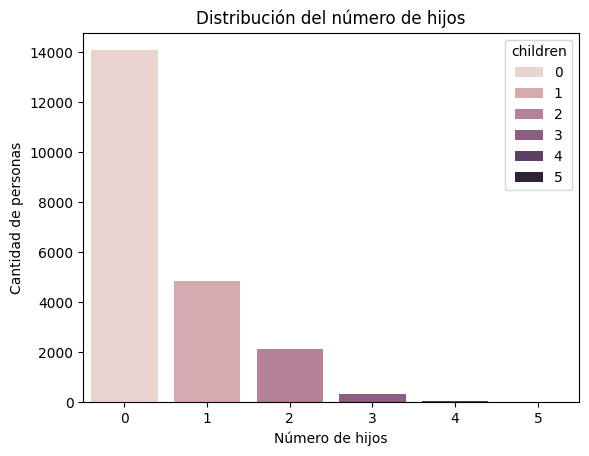

children
0    14091
1     4855
2     2128
3      330
4       41
5        9
Name: count, dtype: int64

In [60]:
sns.countplot(data=df, x='children', hue='children')
plt.title('Distribución del número de hijos')
plt.xlabel('Número de hijos')
plt.ylabel('Cantidad de personas')
plt.show()

df['children'].value_counts()

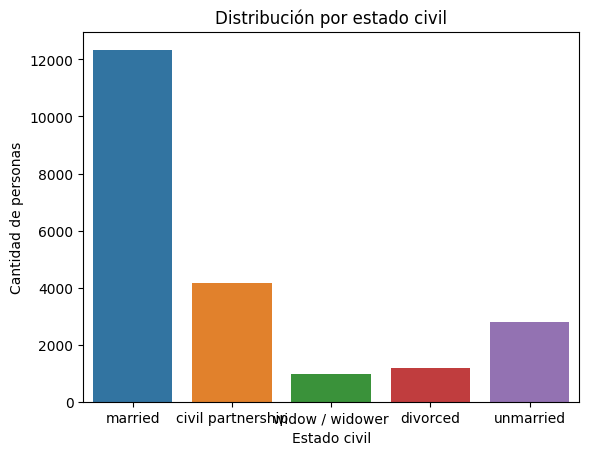

family_status
married              12339
civil partnership     4151
unmarried             2810
divorced              1195
widow / widower        959
Name: count, dtype: int64

In [61]:
sns.countplot(data=df, x='family_status', hue='family_status')
plt.title('Distribución por estado civil')
plt.xlabel('Estado civil')
plt.ylabel('Cantidad de personas')
plt.show()
df['family_status'].value_counts()

Ahora clasifiquemos deudores con hijos

In [62]:
# Vamos a converir los datos, para deudores usaremos 1 y no deudores 0

def children_range(row):
    if row['children'] == 0:
        return 'sin hijos'
    else:
        return 'con hijos'

df.apply(children_range, axis=1)

0        con hijos
1        con hijos
2        sin hijos
3        con hijos
4        sin hijos
           ...    
21449    con hijos
21450    sin hijos
21451    con hijos
21452    con hijos
21453    con hijos
Length: 21454, dtype: object

In [63]:
df['children_range']= df.apply(children_range, axis=1)
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_range,deb_name,children_range
0,1,352,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-50,no deudor,con hijos
1,1,168,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,30-40,no deudor,con hijos
2,0,234,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,30-40,no deudor,sin hijos
3,3,172,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,30-40,no deudor,con hijos
4,0,14178,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,50-60,no deudor,sin hijos


In [64]:
df['children_range'].value_counts()

children_range
sin hijos    14091
con hijos     7363
Name: count, dtype: int64

In [65]:
df['children_range'].describe()

count         21454
unique            2
top       sin hijos
freq          14091
Name: children_range, dtype: object

In [66]:
df['total_income'].describe()

count     21454.000000
mean      26787.022706
std       15657.948215
min        3306.762000
25%       17213.621250
50%       24565.763500
75%       31330.237250
max      362496.645000
Name: total_income, dtype: float64

Vamos a categorizar los ingresos, pondremos a los clientes en rangos salariales; teniendo en cuenta el valor minimo es de 3000

In [67]:
def income_range(row):
    if row ['total_income'] < 3000:
        return'0 - 3000'
    if row ['total_income'] < 9000:
        return'3000 - 9000'
    if row ['total_income'] < 15000:
        return'9000 - 15000'
    if row ['total_income'] < 21000:
        return'15000 - 21000'
    if row ['total_income'] < 27000:
        return'21000 - 27000'
    else:
        return '27000+'

In [68]:
df['income_range'] = df.apply(income_range, axis=1)

In [69]:
# distribucion por tipo de ingreso

df['income_range'].value_counts().sort_values()

income_range
3000 - 9000       636
9000 - 15000     3107
15000 - 21000    4343
21000 - 27000    4947
27000+           8421
Name: count, dtype: int64

In [70]:
df['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

In [71]:
# Vamos a categorizar el uso de los prestamos

def change_purpose(row):
    purpose_category='unknow'

    if 'wedding' in row['purpose']:
        purpose_category='wedding'


    elif ('real' in row['purpose']) or ('state' in row['purpose']) or ('house' in row['purpose']) or ('property' in row['purpose']) or ('housing' in row['purpose']):
        purpose_category='real estate'


    elif 'car' in row['purpose']:
        purpose_category='car'

    elif ('education' in row['purpose']) or ('educated' in row['purpose']) or ('university' in row['purpose']):
        purpose_category='education'

    return purpose_category

In [72]:
df.apply(change_purpose,axis=1).value_counts()

real estate    10811
car             4306
education       4013
wedding         2324
Name: count, dtype: int64

In [73]:
df['purpose_category']= df.apply(change_purpose,axis=1)
df.sample(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_range,deb_name,children_range,income_range,purpose_category
16869,0,65,26,some college,2,married,0,F,employee,0,17855.128,to own a car,20-30,no deudor,sin hijos,15000 - 21000,car
3002,1,86,41,secondary education,1,divorced,3,F,employee,0,21395.654,transactions with commercial real estate,40-50,no deudor,con hijos,21000 - 27000,real estate
20430,1,18,29,bachelor's degree,0,civil partnership,1,F,business,0,12137.420,to have a wedding,20-30,no deudor,con hijos,9000 - 15000,wedding
10118,1,170,37,secondary education,1,married,0,F,business,0,36410.915,purchase of the house,30-40,no deudor,con hijos,27000+,real estate
9671,0,14772,61,bachelor's degree,0,married,0,F,retiree,0,11077.444,housing renovation,60+,no deudor,sin hijos,9000 - 15000,real estate


#### Comprobar Hipotesis. 

Hipotesis 1 : Existe correlacion entre tener hijos y pagar a tiempo ?

In [74]:
deb_by_child =df.groupby(['children','deb_name'])['debt'].value_counts().reset_index()
deb_by_child

,children,deb_name,debt,count
0,0,deudor,1,1063
1,0,no deudor,0,13028
2,1,deudor,1,445
3,1,no deudor,0,4410
4,2,deudor,1,202
5,2,no deudor,0,1926
6,3,deudor,1,27
7,3,no deudor,0,303
8,4,deudor,1,4
9,4,no deudor,0,37


In [75]:
children= df['children'].value_counts().reset_index()
children

,children,count
0,0,14091
1,1,4855
2,2,2128
3,3,330
4,4,41
5,5,9


In [76]:
deb_by_child_1= deb_by_child.merge(children, on='children')
deb_by_child_1["%_of_total"] = deb_by_child_1['count_x']/deb_by_child_1['count_y'] *100
deb_by_child_1

,children,deb_name,debt,count_x,count_y,%_of_total
0,0,deudor,1,1063,14091,7.543822
1,0,no deudor,0,13028,14091,92.456178
2,1,deudor,1,445,4855,9.165808
3,1,no deudor,0,4410,4855,90.834192
4,2,deudor,1,202,2128,9.492481
5,2,no deudor,0,1926,2128,90.507519
6,3,deudor,1,27,330,8.181818
7,3,no deudor,0,303,330,91.818182
8,4,deudor,1,4,41,9.756098
9,4,no deudor,0,37,41,90.243902


Podemos observar que las personas que tienen 4 hijos tienen un porcentaje del 9.7% de ser deudores, si comparamos el porcentaje con menos deudores son los clientes quienes no tiene hijos con un porcentaje del 7.54% 

#### Hipotesis 2:

Existe una correlacion entre la situacion familiar y la deuda ?

In [77]:
deb_group= df.groupby('family_status').agg({'debt':['size','sum']})
deb_group

debt     
                    size  sum
family_status                
civil partnership   4151  388
divorced            1195   85
married            12339  931
unmarried           2810  274
widow / widower      959   63

In [78]:
# Ahora queremos obtener la tasa de los pagos a tiempo (no deudores)
# Vamos a restar el grupo de deudores del total para obtener a los No Deudores
# Luego vamos a dividir y sacar el porcentaje para conocer la tasa de los pagos a tiempo.

cumplimiento = deb_group['debt']['size'] - deb_group['debt']['sum']
tasa_pagos_puntuales = cumplimiento / deb_group['debt']['size']
print('Las tasas de pagos puntuales por estado civil')
print('.............................')

tasa_pagos_puntuales*100

Las tasas de pagos puntuales por estado civil
.............................


family_status
civil partnership    90.652855
divorced             92.887029
married              92.454818
unmarried            90.249110
widow / widower      93.430657
dtype: float64

In [79]:
# Calcular la tasa de incumplimiento basada en el estado familiar
# Ya teniamos el total y la suma de deudores previamente
# Hacemos la operación correspondiente para obtener la tasa de incumplimiento
debt_rates = df.groupby('family_status')['debt'].mean().sort_values(ascending=False)
debt_rates


family_status
unmarried            0.097509
civil partnership    0.093471
married              0.075452
divorced             0.071130
widow / widower      0.065693
Name: debt, dtype: float64

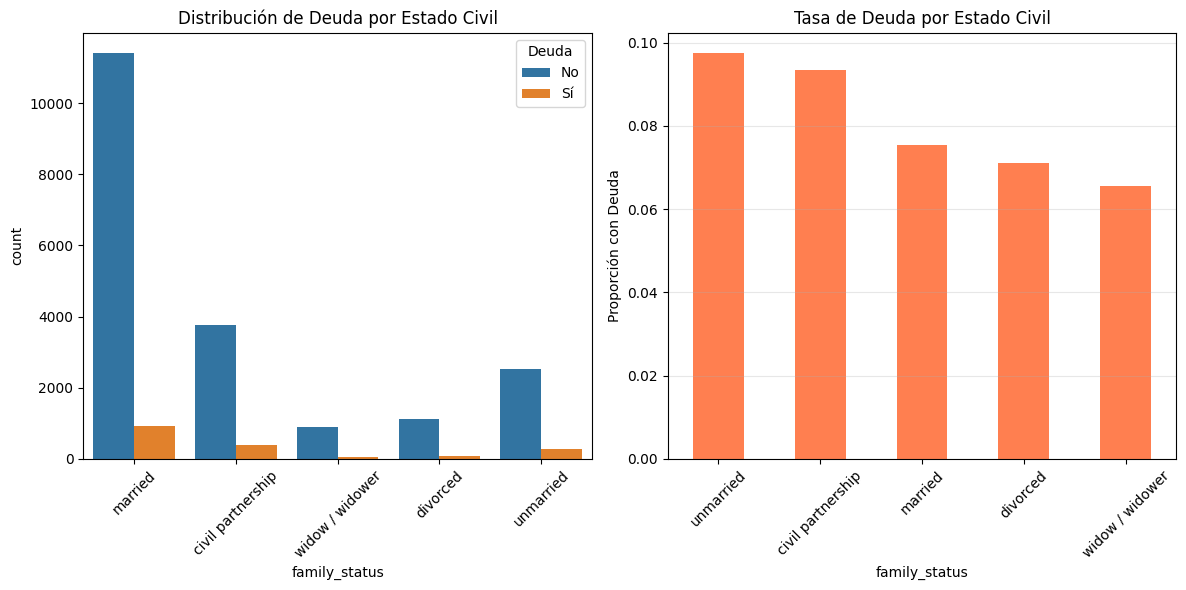

In [80]:
# Visualización
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='family_status', hue='debt')
plt.title('Distribución de Deuda por Estado Civil')
plt.xticks(rotation=45)
plt.legend(title='Deuda', labels=['No', 'Sí'])

plt.subplot(1, 2, 2)
debt_rates.plot(kind='bar', color='coral')
plt.title('Tasa de Deuda por Estado Civil')
plt.ylabel('Proporción con Deuda')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

En nuestra tabla de incumplimiento podemos ver que los viudos representan la menor tasa de incumplimiento respecto a los que viven en unión libre que representan hasta el 9.3%. Por otra parte los casados, quienes representan la mayor cantidad de nuestro dataframe, representan el 7.5% de incumplimiento.

In [81]:
from scipy.stats import chi2_contingency

tabla = pd.crosstab(df['family_status'], df['debt'])
print(tabla)

# Realizar prueba de Chi cuadrado
chi2, p_value,dof, expected = chi2_contingency(tabla)

print(f"Estadístico Chi-cuadrado: {chi2:.4f}")
print(f"Valor p: {p_value:.6f}")
print(f"Grados de libertad: {dof}")

alpha = 0.05   
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Existe asociación entre estado civil y deuda")
else:
    print("No podemos rechazar la hipótesis nula: No existe asociación entre estado civil y deuda")


debt                   0    1
family_status                
civil partnership   3763  388
divorced            1110   85
married            11408  931
unmarried           2536  274
widow / widower      896   63
Estadístico Chi-cuadrado: 28.5915
Valor p: 0.000009
Grados de libertad: 4
Rechazamos la hipótesis nula: Existe asociación entre estado civil y deuda


#### Conclusión

Los solteros y personas en uniones civiles tienen significativamente mayor probabilidad de incumplimiento (9.75% y 9.35% respectivamente), mientras que viudos y divorciados muestran el menor riesgo (6.57% y 7.11%). Esta asociación es estadísticamente sólida y debería considerarse en la evaluación de riesgo crediticio, especialmente para segmentar políticas de aprobación y monitoreo.

El estado civil es un predictor estadísticamente significativo del riesgo de deuda, con solteros y uniones civiles mostrando aproximadamente más probabilidad de incumplimiento que viudos. lo cual representa información valiosa para la segmentación de riesgo y optimización de políticas crediticias.

#### ¿Existe diferencia en el ingreso promedio entre quienes tienen deuda vs quienes no?

Hipótesis:
H₀: μ_deuda = μ_no_deuda (No hay diferencia en ingresos medios)

H₁: μ_deuda ≠ μ_no_deuda (Existe diferencia en ingresos medios)

In [82]:
deudores = df[df['debt']==1]['total_income']
no_deudores= df[df['debt']==0]['total_income']

print(f"Deudores: {len(deudores)} registros")
print(f"No deudores: {len(no_deudores)} registros")


Deudores: 1741 registros
No deudores: 19713 registros


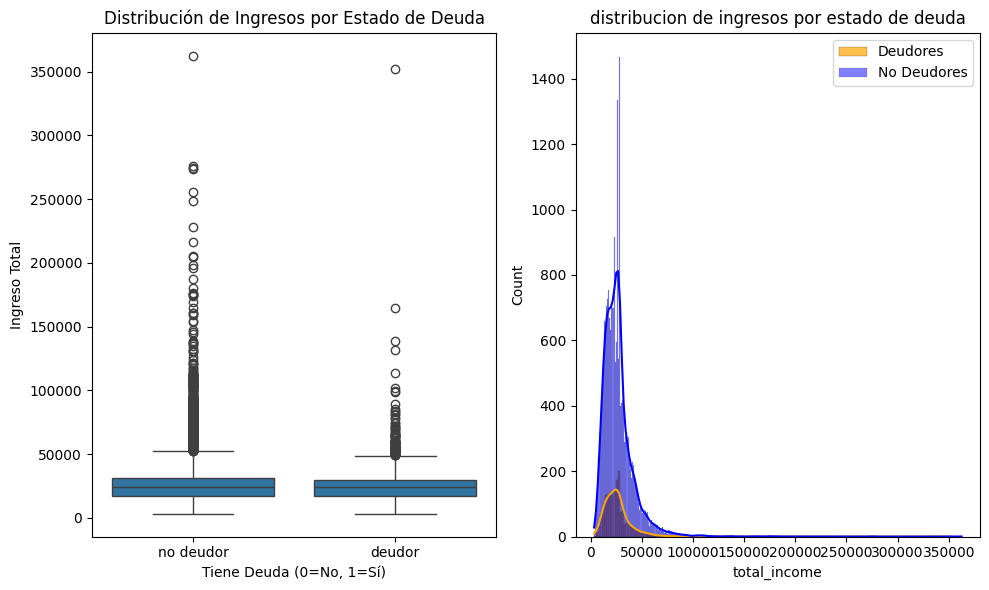

In [83]:
# Boxplot comparativo

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(x='deb_name', y='total_income', data= df)
plt.title('Distribución de Ingresos por Estado de Deuda')
plt.xlabel('Tiene Deuda (0=No, 1=Sí)')
plt.ylabel('Ingreso Total')

plt.subplot(1,2,2)
sns.histplot(deudores,color='orange',kde=True, label='Deudores', alpha=0.7)
sns.histplot(no_deudores,color='blue',kde=True, label='No Deudores', alpha=0.5)
plt.title('distribucion de ingresos por estado de deuda')
plt.legend()

plt.tight_layout()
plt.show()

In [84]:
# Prueba de Normalidad
print("=== PRUEBA DE NORMALIDAD ===")
stat_deudores, p_deudores = stats.shapiro(deudores)
stat_no_deduores, p_no_deudores = stats.shapiro(no_deudores.sample(min(5000, len(no_deudores))))


print(f"Deudores - p_value: {p_deudores:.5f}{'(normal)' if p_deudores > 0.05 else '(no normal)'}")
print(f"No_Deudores - p_value: {p_no_deudores:.5f}{'(normal)' if p_no_deudores > 0.05 else '(no normal)'}")

# Supuesto 2: Homogeneidad de varianzas (prueba de Levene)
print("\n=== PRUEBA DE HOMOGENEIDAD DE VARIANZAS ===")
levene_stat, levene_p = stats.levene(deudores, no_deudores)
print(f"Levene test - p-value: {levene_p:.5f} {'(Varianzas iguales)' if levene_p > 0.05 else '(Varianzas diferentes)'}")

=== PRUEBA DE NORMALIDAD ===
Deudores - p_value: 0.00000(no normal)
No_Deudores - p_value: 0.00000(no normal)

=== PRUEBA DE HOMOGENEIDAD DE VARIANZAS ===
Levene test - p-value: 0.01205 (Varianzas diferentes)


In [85]:
# Realizar la prueba t de Student
# si las varianzas son iguales usamos equal_var=True, de lo contrario False

equal_var = True if levene_p > 0.05 else False

results = stats.ttest_ind(deudores, no_deudores, equal_var=equal_var)

print('p_value:' , results.pvalue)

alpha = 0.05
# Se compara los valores p obtenidos con el nivel de significación estadística
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

p_value: 0.08758485824204418
No podemos rechazar la hipótesis nula


Conclusión: No existe evidencia estadística suficiente para afirmar que hay diferencia en los ingresos medios entre deudores y no deudores

#### Conclusion final

A lo largo del proyecto, se realizó el análisis inicial de los datos, revisando los valores duplicados.
Se utilizaron diferentes métodos para el tratamiento de valores ausentes.
Posteriormente, se llevó a cabo un análisis exploratorio de los datos para conocer sus características y evaluar su calidad.
Finalmente, se realizaron pruebas de hipótesis, lo que permitió establecer dos conclusiones relevantes para el estudio: la primera, que el estado civil es un buen indicador para identificar a los deudores morosos; y la segunda, que no existe evidencia estadística suficiente para afirmar que los ingresos de deudores y no deudores son diferentes.